In [410]:
import preprocessing as prep
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import helper as hlp
from bb_binary import FrameContainer, Repository, load_frame_container
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from collections import Counter

import helper as hlp
import time
import datetime
import sys

# Testing iter_frames() mit `begin` and `end`

In [533]:
path = "/mnt/data/20150822/"

In [534]:
repo = Repository(path)

min = sys.maxsize
for frame, fc in repo.iter_frames():
    if (frame.timestamp < min):
        min = frame.timestamp
print(min)
print(datetime.datetime.fromtimestamp(min))

s = min + 10*60
e = s + 2*60
print("From: {}".format(datetime.datetime.fromtimestamp(s)))
print("To: {}".format(datetime.datetime.fromtimestamp(e)))

count = 0
l = []
for frame, fc in repo.iter_frames(begin=s, end=e, cam=None):
    count += 1
    l.append([frame.timestamp, fc.camId, fc.id, frame.frameIdx, frame.id ])
print(count)

1440201908.542753
2015-08-22 00:05:08.542753
From: 2015-08-22 00:15:08.542753
To: 2015-08-22 00:17:08.542753
1440


Hier sollen Frames für insgesamt 2 Minuten (alle Kameras) bei rauskommen.

In [538]:
count/4/3/2

60.0

In [535]:
df = DataFrame(l, columns=['timestamp', 'cam', 'fcid', 'frameIdx', 'frameid'])

In [536]:
df.sort_values(by='timestamp')

,timestamp,cam,fcid,frameIdx,frameid
750,1.440203e+09,1,10486475669690815502,702,0
0,1.440203e+09,3,10581779802665057523,776,0
248,1.440203e+09,0,15015016821248640699,773,0
499,1.440203e+09,2,16803839146906050043,773,0
751,1.440203e+09,1,10486475669690815502,703,0
1,1.440203e+09,3,10581779802665057523,777,0
249,1.440203e+09,0,15015016821248640699,774,0
500,1.440203e+09,2,16803839146906050043,774,0
752,1.440203e+09,1,10486475669690815502,704,0
2,1.440203e+09,3,10581779802665057523,778,0


# Dateien vergleichen (timestamp From am FrameContainer)
Pro Datei vergleichen, den Timestamp am FrameContainer.
Und dann immer den minimalen Timestamp von allen Frames pro FrameContainer.

In [539]:
path = "/mnt/data/2015082215/"

In [540]:
files = hlp.get_files(path)

In [541]:
files

array([[ '/mnt/data/2015082215/2015/08/22/15/00/Cam_3_2015-08-22T15:04:01.415537Z--2015-08-22T15:09:42.430042Z.bbb',
        '/mnt/data/2015082215/2015/08/22/15/00/Cam_0_2015-08-22T15:04:02.986627Z--2015-08-22T15:09:44.012132Z.bbb',
        '/mnt/data/2015082215/2015/08/22/15/00/Cam_2_2015-08-22T15:04:03.113634Z--2015-08-22T15:09:44.128139Z.bbb',
        '/mnt/data/2015082215/2015/08/22/15/00/Cam_1_2015-08-22T15:04:26.298959Z--2015-08-22T15:10:07.314465Z.bbb'],
       [ '/mnt/data/2015082215/2015/08/22/15/00/Cam_3_2015-08-22T15:09:42.763061Z--2015-08-22T15:15:23.777565Z.bbb',
        '/mnt/data/2015082215/2015/08/22/15/00/Cam_0_2015-08-22T15:09:44.345151Z--2015-08-22T15:15:25.360656Z.bbb',
        '/mnt/data/2015082215/2015/08/22/15/00/Cam_2_2015-08-22T15:09:44.461158Z--2015-08-22T15:15:25.476663Z.bbb',
        '/mnt/data/2015082215/2015/08/22/15/00/Cam_1_2015-08-22T15:10:07.647484Z--2015-08-22T15:15:48.662988Z.bbb'],
       [ '/mnt/data/2015082215/2015/08/22/15/00/Cam_3_2015-08-22T15:

In [153]:
sstart = []
for flist in files:
    start = []
    for f in flist:
        fc = load_frame_container(f)
        start.append(fc.fromTimestamp)
    
    sstart.append(start)

In [154]:
len(sstart)

10

In [155]:
df = DataFrame(sstart)

In [156]:
df.head()

,0,1,2,3
0,1.440256e+09,1.440256e+09,1.440256e+09,1.440256e+09
1,1.440256e+09,1.440256e+09,1.440256e+09,1.440256e+09
2,1.440257e+09,1.440257e+09,1.440257e+09,1.440257e+09
3,1.440257e+09,1.440257e+09,1.440257e+09,1.440257e+09
4,1.440257e+09,1.440257e+09,1.440257e+09,1.440257e+09


In [157]:
df1 = df.apply(lambda x: Series((a,b) for a,b in list(itertools.product(*[list(x),list(x)])) if a < b ), axis=1)

In [158]:
df2 = df1.applymap(lambda x: x[0]-x[1])

## Minimaler und Maximaler Fehler

In [542]:
df2.max(axis=1)

0   -0.127007
1   -0.116006
2   -0.116006
3   -0.119006
4   -0.120007
5   -0.122007
6   -0.124007
7   -0.125007
8   -0.128007
9   -0.130007
dtype: float64

In [159]:
df2.min(axis=1)

0   -24.883423
1   -24.884423
2   -24.886423
3   -24.887423
4   -24.888423
5   -24.890424
6   -24.892424
7   -24.893424
8   -24.894424
9   -24.896424
dtype: float64

# Timestampf am ersten Frame imFrameContainer vergleichen

In [160]:
sstart = []
for flist in files:
    start = []
    for f in flist:
        fc = load_frame_container(f)
        start.append(fc.frames[0].timestamp)
    
    sstart.append(start)

In [161]:
sstart[0]

[1440255841.415537, 1440255842.986627, 1440255843.113634, 1440255866.29896]

In [162]:
df = DataFrame(sstart)

In [163]:
df.head()

,0,1,2,3
0,1.440256e+09,1.440256e+09,1.440256e+09,1.440256e+09
1,1.440256e+09,1.440256e+09,1.440256e+09,1.440256e+09
2,1.440257e+09,1.440257e+09,1.440257e+09,1.440257e+09
3,1.440257e+09,1.440257e+09,1.440257e+09,1.440257e+09
4,1.440257e+09,1.440257e+09,1.440257e+09,1.440257e+09


In [164]:
df1 = df.apply(lambda x: Series((a,b) for a,b in list(itertools.product(*[list(x),list(x)])) if a < b ), axis=1)

In [165]:
df2 = df1.applymap(lambda x: x[0]-x[1])

## Minimaler und Maximaler Fehler


In [544]:
df2.max(axis=1)

0   -0.127007
1   -0.116006
2   -0.116006
3   -0.119006
4   -0.120007
5   -0.122007
6   -0.124007
7   -0.125007
8   -0.128007
9   -0.130007
dtype: float64

In [166]:
df2.min(axis=1)

0   -24.883423
1   -24.884423
2   -24.886423
3   -24.887423
4   -24.888423
5   -24.890424
6   -24.892424
7   -24.893424
8   -24.894424
9   -24.896424
dtype: float64

# Dateien über den gesamten Zeitraum

In [547]:
repo = Repository("/mnt/data/all/")

In [709]:
file_list = []
for f in repo.iter_fnames():
    string = f.split('2015')
    datum = string[1].split("/")
    file_list.append([datum[1], datum[2], datum[3], f])

# DataFrame with all files
df = DataFrame(file_list, columns=['m', 'd', 'h', 'file'])
    
# Group by hours
gr = df.groupby(by=['m','d','h'])

In [710]:
df.head(5)

,m,d,h,file
0,08,19,16,/mnt/data/all/2015/08/19/16/20/Cam_2_2015-08-1...
1,08,19,16,/mnt/data/all/2015/08/19/16/20/Cam_0_2015-08-1...
2,08,19,16,/mnt/data/all/2015/08/19/16/20/Cam_1_2015-08-1...
3,08,19,16,/mnt/data/all/2015/08/19/16/20/Cam_3_2015-08-1...
4,08,19,16,/mnt/data/all/2015/08/19/16/40/Cam_0_2015-08-1...


## Anzahl der Dateien pro Kamera pro Stunde

In [559]:
gr = df.groupby(by=["m", "d", "h"])

In [560]:
mdh = []
c = []

In [561]:
for g, group in gr:
    m,d,h = g
    files = (list(group.file))
    a = [int(f.split('/')[-1].split("_")[1]) for f in files]
    mdh.append([m,d,h])
    c.append(Counter(a))

In [562]:
dfmdh = DataFrame(mdh, columns=["m", "d", "h"])

In [563]:
dfc = DataFrame(c).fillna(value=0)

In [564]:
dfc.columns = ["cam0", "cam1", "cam2", "cam3"]

In [565]:
df_all = pd.concat([dfmdh, dfc], axis=1)

In [566]:
df_all.head()

,m,d,h,cam0,cam1,cam2,cam3
0,08,19,16,2,2.0,2.0,2.0
1,08,19,17,4,4.0,4.0,4.0
2,08,19,18,3,3.0,3.0,3.0
3,08,19,19,4,4.0,5.0,4.0
4,08,19,20,4,4.0,3.0,4.0


In [567]:
df_all['summ'] = df_all.ix[:,3:].sum(axis=1)

In [568]:
df_all.head()

,m,d,h,cam0,cam1,cam2,cam3,summ
0,08,19,16,2,2.0,2.0,2.0,8.0
1,08,19,17,4,4.0,4.0,4.0,16.0
2,08,19,18,3,3.0,3.0,3.0,12.0
3,08,19,19,4,4.0,5.0,4.0,17.0
4,08,19,20,4,4.0,3.0,4.0,15.0


In [589]:
df_all.tail()

,m,d,h,cam0,cam1,cam2,cam3,summ
1595,10,26,06,6,6.0,6.0,6.0,24.0
1596,10,26,07,11,10.0,10.0,11.0,42.0
1597,10,26,08,6,1.0,1.0,10.0,18.0
1598,10,26,09,11,10.0,10.0,10.0,41.0
1599,10,26,10,2,2.0,2.0,0.0,6.0


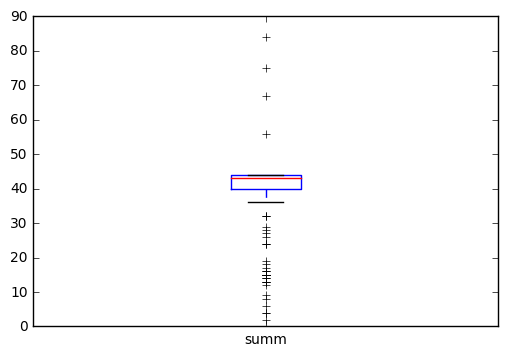

In [569]:
df_all.summ.plot.box()

In [570]:
df_all.summ.describe()

count    1600.000000
mean       41.631875
std         4.772378
min         2.000000
25%        40.000000
50%        43.000000
75%        44.000000
max        84.000000
Name: summ, dtype: float64

## Verlauf über die Zeit

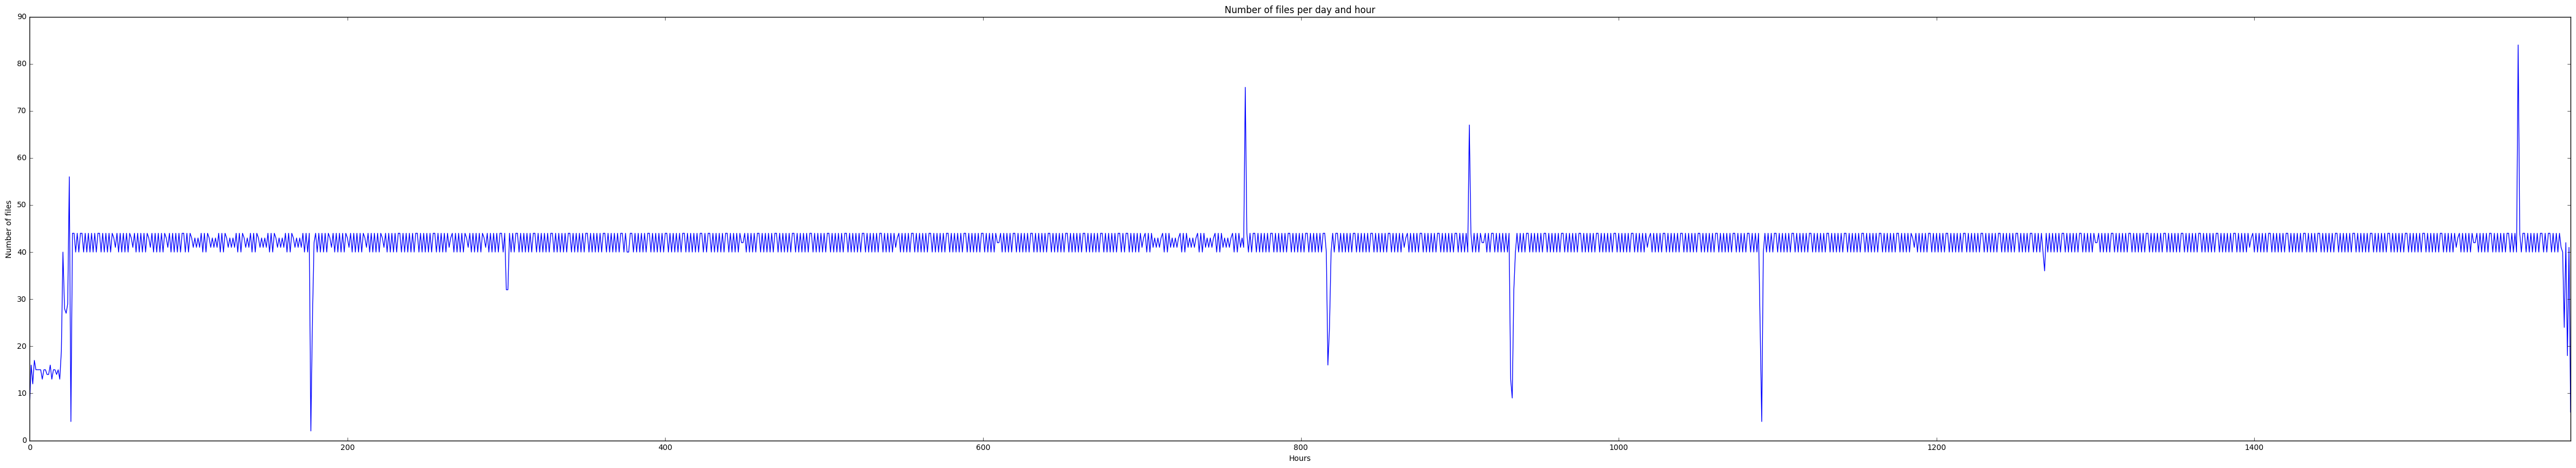

In [571]:
fig, axes = plt.subplots()
df_all.summ.plot()
fig.set_size_inches(60,10)
axes.set_title("Number of files per day and hour")
axes.set_xlabel("Hours")
axes.set_ylabel("Number of files")

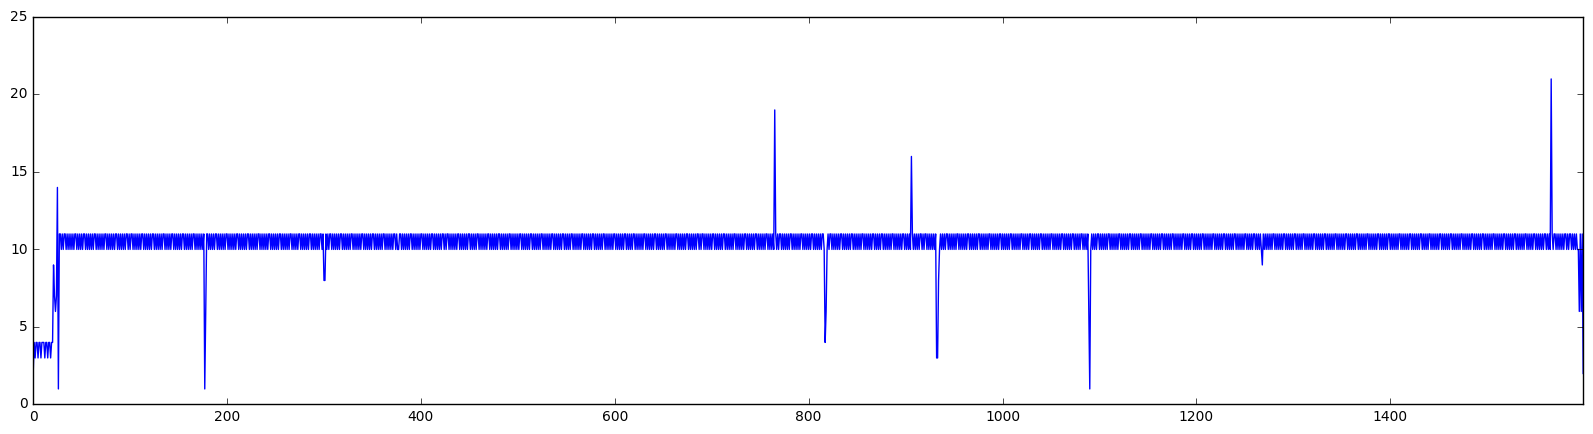

In [575]:
fig, axes = plt.subplots()
fig.set_size_inches(20,5)
df_all.cam0.plot()

## Schlechte Tage

In [593]:
list(df_all.query("summ > 44 | summ <40").iloc[:,:2].apply(lambda x: (x.m, x.d), axis=1).unique())

[('08', '19'),
 ('08', '20'),
 ('08', '27'),
 ('09', '01'),
 ('09', '21'),
 ('09', '23'),
 ('09', '27'),
 ('09', '28'),
 ('10', '05'),
 ('10', '12'),
 ('10', '25'),
 ('10', '26')]

In [573]:
df_all[df_all.summ > 44]

,m,d,h,cam0,cam1,cam2,cam3,summ
25,08,20,17,14,14.0,14.0,14.0,56.0
765,09,21,05,19,19.0,18.0,19.0,75.0
906,09,27,05,16,17.0,17.0,17.0,67.0
1566,10,25,01,21,21.0,21.0,21.0,84.0


In [574]:
df_all[df_all.summ < 40]

,m,d,h,cam0,cam1,cam2,cam3,summ
0,08,19,16,2,2.0,2.0,2.0,8.0
1,08,19,17,4,4.0,4.0,4.0,16.0
2,08,19,18,3,3.0,3.0,3.0,12.0
3,08,19,19,4,4.0,5.0,4.0,17.0
4,08,19,20,4,4.0,3.0,4.0,15.0
5,08,19,21,3,4.0,4.0,4.0,15.0
6,08,19,22,4,4.0,4.0,3.0,15.0
7,08,19,23,4,4.0,3.0,4.0,15.0
8,08,20,00,3,3.0,4.0,3.0,13.0
9,08,20,01,4,4.0,3.0,4.0,15.0


## Teilbarkeit durch 4 :D

In [496]:
sum(df_all.query("m=='08' & d=='23'").summ)/4

253.0

# Eine Stunde genauer anschauen: '08', '19', '19'

In [576]:
repo2 = Repository("/mnt/data/2015081919/")

In [577]:
fff = list(repo2.iter_fnames())

In [578]:
for i in list(range(len(fff))):
    fc = load_frame_container(fff[i])
    print(len(fc.frames), fff[i].split("/")[-1])

148 Cam_2_2015-08-19T19:00:00.987534Z--2015-08-19T19:02:27.999943Z.bbb
1024 Cam_0_2015-08-19T19:00:01.571568Z--2015-08-19T19:17:04.664086Z.bbb
1024 Cam_1_2015-08-19T19:00:01.646573Z--2015-08-19T19:17:04.733089Z.bbb
532 Cam_3_2015-08-19T19:00:01.956589Z--2015-08-19T19:08:52.999963Z.bbb
1024 Cam_2_2015-08-19T19:02:29Z--2015-08-19T19:19:32.083518Z.bbb
1024 Cam_3_2015-08-19T19:08:54.000021Z--2015-08-19T19:25:57.083539Z.bbb
1024 Cam_0_2015-08-19T19:17:05.664143Z--2015-08-19T19:34:08.756660Z.bbb
1024 Cam_1_2015-08-19T19:17:05.733146Z--2015-08-19T19:34:08.820663Z.bbb
1024 Cam_2_2015-08-19T19:19:33.083575Z--2015-08-19T19:36:36.171092Z.bbb
1024 Cam_3_2015-08-19T19:25:58.083595Z--2015-08-19T19:43:01.167113Z.bbb
1024 Cam_0_2015-08-19T19:34:09.756717Z--2015-08-19T19:51:12.848234Z.bbb
1024 Cam_1_2015-08-19T19:34:09.820722Z--2015-08-19T19:51:12.907238Z.bbb
1024 Cam_2_2015-08-19T19:36:37.171149Z--2015-08-19T19:53:40.263667Z.bbb
1024 Cam_3_2015-08-19T19:43:02.167170Z--2015-08-19T20:00:05.250686Z.bbb
1

In [579]:
len(fc.frames)

1024

# Anzahl an Kamera Dateien

In [580]:
repo3 = Repository("/mnt/data/all/")

In [581]:
file = list(repo3.iter_fnames())

In [582]:
(len(file))/4

16652.75

In [583]:
file[-20:]

['/mnt/data/all/2015/10/26/09/40/Cam_0_2015-10-26T09:41:32.622534Z--2015-10-26T09:47:13.640039Z.bbb',
 '/mnt/data/all/2015/10/26/09/40/Cam_1_2015-10-26T09:42:34.251060Z--2015-10-26T09:48:15.269565Z.bbb',
 '/mnt/data/all/2015/10/26/09/40/Cam_2_2015-10-26T09:42:50.531991Z--2015-10-26T09:48:31.549495Z.bbb',
 '/mnt/data/all/2015/10/26/09/40/Cam_3_2015-10-26T09:47:13.911056Z--2015-10-26T09:52:54.928560Z.bbb',
 '/mnt/data/all/2015/10/26/09/40/Cam_0_2015-10-26T09:47:13.974059Z--2015-10-26T09:52:54.991564Z.bbb',
 '/mnt/data/all/2015/10/26/09/40/Cam_1_2015-10-26T09:48:15.602583Z--2015-10-26T09:53:56.620089Z.bbb',
 '/mnt/data/all/2015/10/26/09/40/Cam_2_2015-10-26T09:48:31.883514Z--2015-10-26T09:54:12.901021Z.bbb',
 '/mnt/data/all/2015/10/26/09/40/Cam_3_2015-10-26T09:52:55.261579Z--2015-10-26T10:12:58.649410Z.bbb',
 '/mnt/data/all/2015/10/26/09/40/Cam_0_2015-10-26T09:52:55.325583Z--2015-10-26T09:58:36.343089Z.bbb',
 '/mnt/data/all/2015/10/26/09/40/Cam_1_2015-10-26T09:53:56.953108Z--2015-10-26T09:

In [584]:
file = file[0:66611-12]

In [585]:
len(file)

66599

Am letzten Tag ist irgendwas mit der Camera 3 komisch.

# Wie oft gibt es welche Dateien (kameras)

In [586]:
a = [int(f.split('/')[-1].split("_")[1]) for f in file]

In [587]:
dfa = DataFrame(a, columns=["A"])

In [588]:
Counter(list(dfa.A))

Counter({0: 16650, 1: 16646, 2: 16647, 3: 16656})

# Versatz der Dateien

In [725]:
df_all.query("m=='08' & d=='21'").iloc[:,3:7].sum()

cam0    254.0
cam1    254.0
cam2    254.0
cam3    254.0
dtype: float64

In [614]:
gr1 = df_all.groupby(by=["m", "d"])

In [623]:
gr1sum = gr1.apply(sum)

## An welchen Tagen stimmt die Anzahl der Dateien pro Kamera nicht überein?

In [629]:
gr1sum["same"] = (gr1sum.cam0 == gr1sum.cam1) & (gr1sum.cam0 == gr1sum.cam2) & (gr1sum.cam0 == gr1sum.cam3)

In [638]:
gr1sum[gr1sum.same == False]

m             d             h   cam0   cam1   cam2   cam3  \
m  d                                                                          
08 19  8.080808e+14  1.919192e+15  1.617182e+15   28.0   29.0   28.0   28.0   
   20  8.080808e+46  2.020202e+47  1.020304e+44  145.0  147.0  149.0  146.0   
   27  8.080808e+34  2.727273e+35  1.080910e+32  177.0  176.0  176.0  177.0   
09 18  9.090909e+46  1.818182e+47  1.020304e+44  253.0  253.0  254.0  253.0   
   19  9.090909e+46  1.919192e+47  1.020304e+44  254.0  254.0  253.0  254.0   
   27  9.090909e+46  2.727273e+47  1.020304e+44  258.0  259.0  259.0  259.0   
   28  9.090909e+32  2.828283e+33  1.020304e+30  161.0  161.0  160.0  160.0   
10 17  1.010101e+47  1.717172e+47  1.020304e+44  253.0  253.0  253.0  254.0   
   18  1.010101e+47  1.818182e+47  1.020304e+44  254.0  254.0  254.0  253.0   
   26  1.010101e+21  2.626263e+21  1.020304e+18   98.0   91.0   92.0   99.0   

         summ   same  
m  d                  
08 19   113.0  False  
   20   587.0  False  
   27   706.0  False  
09 18  1013.0  False  
   19  1015.0  False  
   27  1035.0  False  
   28   642.0  False  
10 17  1013.0  False  
   18  1015.0  False  
   26   380.0  False

## Wie ist der Versatz der Kameras an den guten Tagen? - PRO TAG
* z.B. 21.08. bis 26.08.
* 28-31
* 02.09.-17.09. und so weiter


Wenn die Kameras so ziemlich parallel laufen, dann wäre ja alles ganz schön.

In [875]:
good = {8: [21,22,23,24,25,26,28,29,30,31],
        9:[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,22,24,25,26,29,30],
        10:[1,2,3,4,6,7,8,9,10,11,13,14,15,16,19,20,21,22,23,24]}

In [876]:
def toTimestamp(dt):
    try:
        timestamp = datetime.datetime.strptime(dt, "%Y-%m-%dT%H:%M:%S.%fZ")
    except ValueError:
        timestamp = datetime.datetime.strptime(dt, "%Y-%m-%dT%H:%M:%SZ")
        
    return datetime.datetime.timestamp(timestamp)

In [877]:
def getDiffsForDay(df, m,d):
    flist = list(df.query("m=='{}' & d=='{}'".format(m,d)).file)
    flist = np.array(flist).reshape(int(len(flist)/4),4)

    # Timestamps aus den files extrahieren
    ts = []
    for fl in flist:
        start = []
        for f in fl:
            d = f.split("--")[0].split("_")[-1]
            start.append(toTimestamp(d))

        ts.append(start)
    
    dfts = DataFrame(ts)
    
    # Paarweise Differenz bestimmen
    dfts_tuples = dfts.apply(lambda x: Series([(i,j)  for e,i in enumerate(x) for j in x[e+1:]]), axis=1)
    dfts_diffs = dfts_tuples.applymap(lambda x: abs(x[0]-x[1]))
    
    return dfts_diffs

In [902]:
results = []
for item in good:
    for d in good[item]:
        results.append((item, d, getDiffsForDay(df,str(item).zfill(2), str(d).zfill(2))))

In [886]:
data = []
for m,d,r in results:
    data.append((m,d,r.min(axis=1).min(), r.max(axis=1).max()))

In [890]:
df_plotting = DataFrame(data, columns=["month", "day", "mindiff", "maxdiff"])

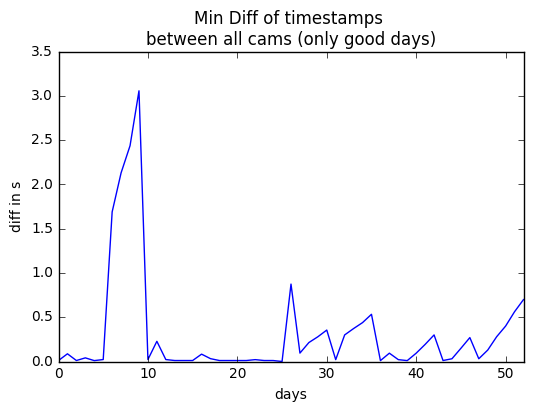

In [924]:
axes = df_plotting.mindiff.plot()
axes.set_title("Min Diff of timestamps \nbetween all cams (only good days)")
axes.set_xlabel("days")
axes.set_ylabel("diff in s")

In [913]:
DataFrame(df_plotting.mindiff.describe())

,mindiff
count,53.000000
mean,0.316356
std,0.627328
min,0.000000
25%,0.011000
50%,0.083005
75%,0.300016
max,3.056175


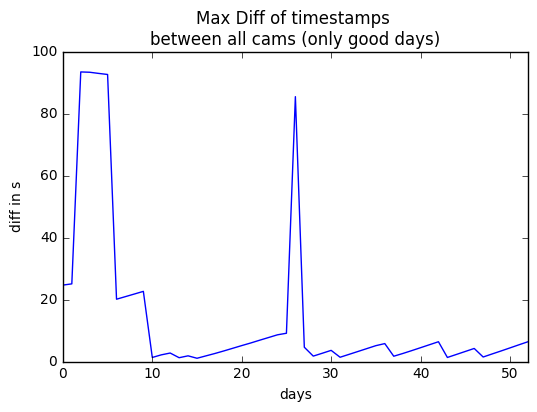

In [923]:
axes = df_plotting.maxdiff.plot()
axes.set_title("Max Diff of timestamps \nbetween all cams (only good days)")
axes.set_xlabel("days")
axes.set_ylabel("diff in s")

In [914]:
DataFrame(df_plotting.maxdiff.describe())

,maxdiff
count,53.000000
mean,14.179849
std,25.989530
min,1.044060
25%,2.433140
50%,4.267245
75%,7.733444
max,93.408343


In [927]:
df_plotting.maxdiff.describe().max()*3

280.2250292301178

# get_Frames genauer anschauen!

In [945]:
pall = "/mnt/data/all/"

repoall = Repository(pall)

m="08"
d="21"
h="00"
begin = "2015-{}-{}T{}:00:00Z".format(m,d,h) # %Y-%m-%dT%H:%M:%SZ
begin_ts = datetime.datetime.timestamp(datetime.datetime.strptime(begin, "%Y-%m-%dT%H:%M:%SZ"))
end_ts = begin_ts + 60*60

In [1001]:
parts = [None, None, None, None]

for i in list(range(4)):
    
    tmp = []
    for frame, fc in repoall.iter_frames(begin=begin_ts, end=end_ts, cam=i):
        tmp.append([frame.timestamp, fc.camId, fc.id, frame.frameIdx, frame.id])
    
    parts[i] = DataFrame(tmp, columns=['timestamp', 'cam', 'fcid', 'frameIdx', 'frameid'])

tsdf = pd.concat([parts[0].timestamp, parts[1].timestamp, parts[2].timestamp, parts[3].timestamp], axis=1 )

In [1003]:
# Paarweise Differenz bestimmen
tsdf_tuples = tsdf.apply(lambda x: Series([(i,j)  for e,i in enumerate(x) for j in x[e+1:]]), axis=1)
tsdf_diffs = tsdf_tuples.applymap(lambda x: abs(x[0]-x[1]))

In [1004]:
tsdf_diffs.max().max()

0.095005989074707031

In [1064]:
def getDiffMaxPerHour(repoall, m, d, h):
    
    # FROM - TO festlegen
    begin = "2015-{}-{}T{}:00:00Z".format(m,d,h) # %Y-%m-%dT%H:%M:%SZ
    begin_ts = datetime.datetime.timestamp(datetime.datetime.strptime(begin, "%Y-%m-%dT%H:%M:%SZ"))
    end_ts = begin_ts + 60*60

    parts = [None, None, None, None]

    # Get Frames for each cam
    for i in list(range(4)):

        tmp = []
        for frame, fc in repoall.iter_frames(begin=begin_ts, end=end_ts, cam=i):
            tmp.append([frame.timestamp, fc.camId, fc.id, frame.frameIdx, frame.id])

        parts[i] = DataFrame(tmp, columns=['timestamp', 'cam', 'fcid', 'frameIdx', 'frameid'])
    
    # Dataframe with all timestamps each column is a camera
    tsdf = pd.concat([parts[0].timestamp, parts[1].timestamp, parts[2].timestamp, parts[3].timestamp], axis=1 )
    
    # Paarweise Differenz bestimmen
    tsdf_tuples = tsdf.apply(lambda x: Series([(i,j)  for e,i in enumerate(x) for j in x[e+1:]]), axis=1)
    tsdf_diffs = tsdf_tuples.applymap(lambda x: abs(x[0]-x[1]))
    
    #return tsdf_diffs.max().max()
    return tsdf_diffs

In [1024]:
getDiffMaxPerHour(repoall, "08", "21", "00")

0.095005989074707031

In [ ]:
diffs_all = []
for item in good:
    for d in good[item]:
        for h in list(range(24)):
            print(item,d,h)
            diffs_all.append((item, d, h, getDiffMaxPerHour(repoall, str(item).zfill(2), str(d).zfill(2), str(h).zfill(2))))

8 21 0
8 21 1
8 21 2
8 21 3
8 21 4
8 21 5
8 21 6
8 21 7
8 21 8
8 21 9
8 21 10
8 21 11
8 21 12
8 21 13
8 21 14
8 21 15
8 21 16
8 21 17
8 21 18
8 21 19
8 21 20
8 21 21
8 21 22
8 21 23
8 22 0
8 22 1
8 22 2
8 22 3
8 22 4
8 22 5
8 22 6
8 22 7
8 22 8
8 22 9
8 22 10
8 22 11
8 22 12
8 22 13
8 22 14
8 22 15
8 22 16
8 22 17
8 22 18
8 22 19
8 22 20
8 22 21
8 22 22
8 22 23
8 23 0
8 23 1
8 23 2
8 23 3
8 23 4
8 23 5
8 23 6
8 23 7
8 23 8
8 23 9
8 23 10
8 23 11
8 23 12
8 23 13
8 23 14
8 23 15
8 23 16
8 23 17
8 23 18
8 23 19
8 23 20
8 23 21
8 23 22
8 23 23
8 24 0
8 24 1
8 24 2
8 24 3
8 24 4
8 24 5
8 24 6
8 24 7
8 24 8
8 24 9
8 24 10
8 24 11
8 24 12
8 24 13
8 24 14
8 24 15
8 24 16
8 24 17
8 24 18
8 24 19
8 24 20
8 24 21
8 24 22
8 24 23
8 25 0
8 25 1
8 25 2
8 25 3
8 25 4
8 25 5
8 25 6
8 25 7
8 25 8
8 25 9
8 25 10
8 25 11
8 25 12
8 25 13
8 25 14
8 25 15
8 25 16
8 25 17
8 25 18
8 25 19
8 25 20
8 25 21
8 25 22
8 25 23
8 26 0
8 26 1
8 26 2
8 26 3
8 26 4
8 26 5
8 26 6
8 26 7
8 26 8
8 26 9
8 26 10
8 26 11
8 26

In [1047]:
dfdiff = DataFrame(diffs_all, columns=["m", "d", "h", "diffs"])

In [1061]:
dfdiff[dfdiff.diffs > 1]


,m,d,h,diffs
65,8,23,17,4.954283
85,8,24,13,252.630450


In [1062]:
252/60

4.2

In [1065]:
ttt = getDiffMaxPerHour(repoall, "08", "24", "13")

In [1070]:
# FROM - TO festlegen
begin = "2015-{}-{}T{}:00:00Z".format(m,d,h) # %Y-%m-%dT%H:%M:%SZ
begin_ts = datetime.datetime.timestamp(datetime.datetime.strptime(begin, "%Y-%m-%dT%H:%M:%SZ"))
end_ts = begin_ts + 59*60

In [1071]:
parts = [None, None, None, None]

In [1072]:
# Get Frames for each cam
for i in list(range(4)):

    tmp = []
    for frame, fc in repoall.iter_frames(begin=begin_ts, end=end_ts, cam=i):
        tmp.append([frame.timestamp, fc.camId, fc.id, frame.frameIdx, frame.id])

    parts[i] = DataFrame(tmp, columns=['timestamp', 'cam', 'fcid', 'frameIdx', 'frameid'])

AssertionError: 

In [1066]:
# Dataframe with all timestamps each column is a camera
tsdf = pd.concat([parts[0].timestamp, parts[1].timestamp, parts[2].timestamp, parts[3].timestamp], axis=1 )

# Paarweise Differenz bestimmen
tsdf_tuples = tsdf.apply(lambda x: Series([(i,j)  for e,i in enumerate(x) for j in x[e+1:]]), axis=1)
tsdf_diffs = tsdf_tuples.applymap(lambda x: abs(x[0]-x[1]))

,0,1,2,3,4,5
0,0.171010,0.262015,0.294017,0.091005,0.123007,0.032002
1,0.172010,0.262015,0.294017,0.090005,0.122007,0.032002
2,0.171010,0.262015,0.293017,0.091005,0.122007,0.031002
3,0.171010,0.262015,0.294017,0.091005,0.123007,0.032002
4,0.172010,0.262015,0.294017,0.090005,0.122007,0.032002
5,0.171010,0.262015,0.293017,0.091005,0.122007,0.031002
6,0.171010,0.262015,0.294017,0.091005,0.123007,0.032002
7,0.172009,0.262015,0.294016,0.090006,0.122007,0.032001
8,0.171009,0.262015,0.293016,0.091006,0.122007,0.031001
9,0.171009,0.262015,0.294017,0.091006,0.123008,0.032002


limit_output extension: Maximum message size of 10000 exceeded with 10911 characters